In [15]:
import csv
import numpy as np

Load Iris dataset from https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data.

In [16]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data -o iris.data

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  4551    0  4551    0     0   6037      0 --:--:-- --:--:-- --:--:--  6051


In [17]:
isrisData = []
with open('iris.data') as csvfile:
  content = csv.reader(csvfile, delimiter=',')
  for row in content:
    if len(row) == 5:
      isrisData+=[row]
#print(isrisData)

### Performing One hot encoding

In [28]:
for i in range(len(isrisData)):
  if(isrisData[i][4]=='Iris-versicolor'):
    isrisData[i][4]=1
    isrisData[i].append(0)
    isrisData[i].append(0)
  elif(isrisData[i][4]=='Iris-virginica'):
    isrisData[i][4]=0
    isrisData[i].append(1)
    isrisData[i].append(0)
  elif(isrisData[i][4]=='Iris-setosa'):
    isrisData[i][4]=0
    isrisData[i].append(0)
    isrisData[i].append(1)
newArry = np.array(isrisData)[:,:]
updateArray = np.array(newArry, dtype=float)


isrisData_enc = np.zeros((len(newArry),7))
isrisData_enc[:,0:4] = newArry[:,0:4]
print(updateArray)


[[5.1 3.5 1.4 ... 0.  0.  1. ]
 [4.9 3.  1.4 ... 0.  0.  1. ]
 [4.7 3.2 1.3 ... 0.  0.  1. ]
 ...
 [6.5 3.  5.2 ... 0.  1.  0. ]
 [6.2 3.4 5.4 ... 0.  1.  0. ]
 [5.9 3.  5.1 ... 0.  1.  0. ]]


In [ ]:
Splitting the iris dataset into 2 numpy arrays, one each for input and output. The first 4 indexes are for inputs and the last 3 indexes are for outputs.

In [19]:
split_index=4
train_x = isris.iloc[:, :4].to_numpy()
train_y = isris.iloc[:, 4:].to_numpy()


Normalizing the data using the formula $$ y = \frac{y_{max} - y_{min}}{x_{max}-x_{min}}(x - x_{min}) + y_{min} $$

In [20]:
x_max = np.max(train_x, axis = 0)
x_min = np.min(train_x, axis = 0)
y_max = 1
y_min = 0

train_x_norm = np.zeros((train_x.shape[0],train_x.shape[1]))
for j in range(train_x.shape[1]):
  for i in range(len(train_x)):
    train_x_norm[i,j] = round(((y_max - y_min)/(x_max[j] - x_min[j]))*(train_x[i,j] - x_min[j]) + y_min,2)
train_x_norm

array([[0.22, 0.62, 0.07, 0.04],
       [0.17, 0.42, 0.07, 0.04],
       [0.11, 0.5 , 0.05, 0.04],
       [0.08, 0.46, 0.08, 0.04],
       [0.19, 0.67, 0.07, 0.04],
       [0.31, 0.79, 0.12, 0.13],
       [0.08, 0.58, 0.07, 0.08],
       [0.19, 0.58, 0.08, 0.04],
       [0.03, 0.37, 0.07, 0.04],
       [0.17, 0.46, 0.08, 0.  ],
       [0.31, 0.71, 0.08, 0.04],
       [0.14, 0.58, 0.1 , 0.04],
       [0.14, 0.42, 0.07, 0.  ],
       [0.  , 0.42, 0.02, 0.  ],
       [0.42, 0.83, 0.03, 0.04],
       [0.39, 1.  , 0.08, 0.13],
       [0.31, 0.79, 0.05, 0.13],
       [0.22, 0.62, 0.07, 0.08],
       [0.39, 0.75, 0.12, 0.08],
       [0.22, 0.75, 0.08, 0.08],
       [0.31, 0.58, 0.12, 0.04],
       [0.22, 0.71, 0.08, 0.13],
       [0.08, 0.67, 0.  , 0.04],
       [0.22, 0.54, 0.12, 0.17],
       [0.14, 0.58, 0.15, 0.04],
       [0.19, 0.42, 0.1 , 0.04],
       [0.19, 0.58, 0.1 , 0.13],
       [0.25, 0.62, 0.08, 0.04],
       [0.25, 0.58, 0.07, 0.04],
       [0.11, 0.5 , 0.1 , 0.04],
       [0.

Creating a scatterplot by using the first and the second column of data, so that each row composes point colored by a label.

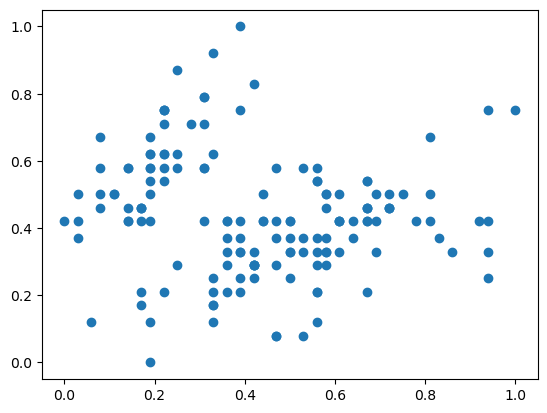

In [21]:
import matplotlib.pyplot as plt
plt.scatter(train_x_norm[:,0],train_x_norm[:,1])

The sigmoid function is frequently used activation of a neuron. It is defined by

$$y=\sigma(x)=\frac{1}{1+e^{-x}}$$

A graf of this function for $x\in <-8,8>$.

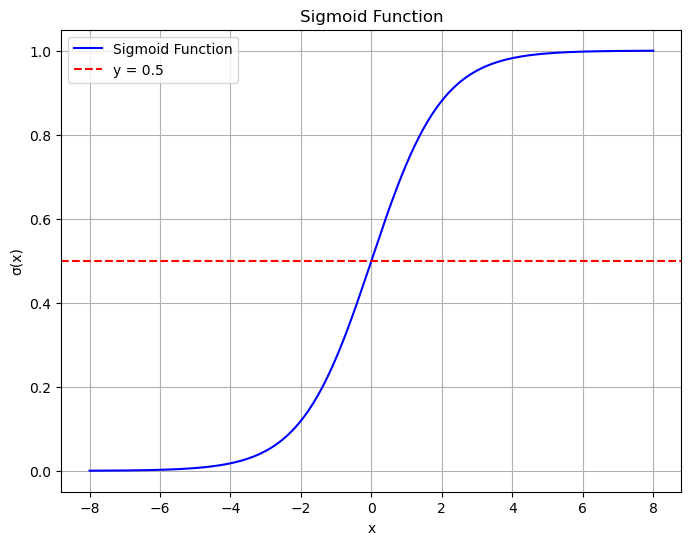

In [22]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
x = np.linspace(-8, 8, 400)
y = sigmoid(x)
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Sigmoid Function', color='b')
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('σ(x)')
plt.grid(True)
plt.axhline(0.5, color='r', linestyle='--', label='y = 0.5')
plt.legend()
plt.show()

The RELU function is frequently used activation function of neurons in deep neural networks. It is defined by

𝑦=relu(𝑥)=max(0,𝑥)
 
A graf of this function for  𝑥∈<−10,10>

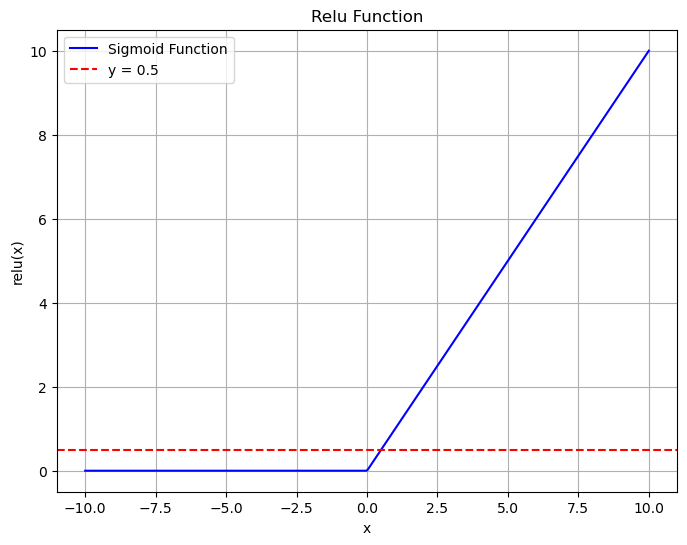

In [23]:
def relu(x):
    return np.maximum(0, x)
x = np.linspace(-10, 10, 400)
y = relu(x)
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Sigmoid Function', color='b')
plt.title('Relu Function')
plt.xlabel('x')
plt.ylabel('relu(x)')
plt.grid(True)
plt.axhline(0.5, color='r', linestyle='--', label='y = 0.5')
plt.legend()
plt.show()


The Gaussian function is frequently used as an activation function of RBF neurons. It is defined by the equation

𝑦=𝑔(𝑥)=𝑒−𝑥22𝜎2
 
A graf of this function for  𝑥∈<−10,10>
  and  𝜎={0.2,0.5,1,2,5}
 .

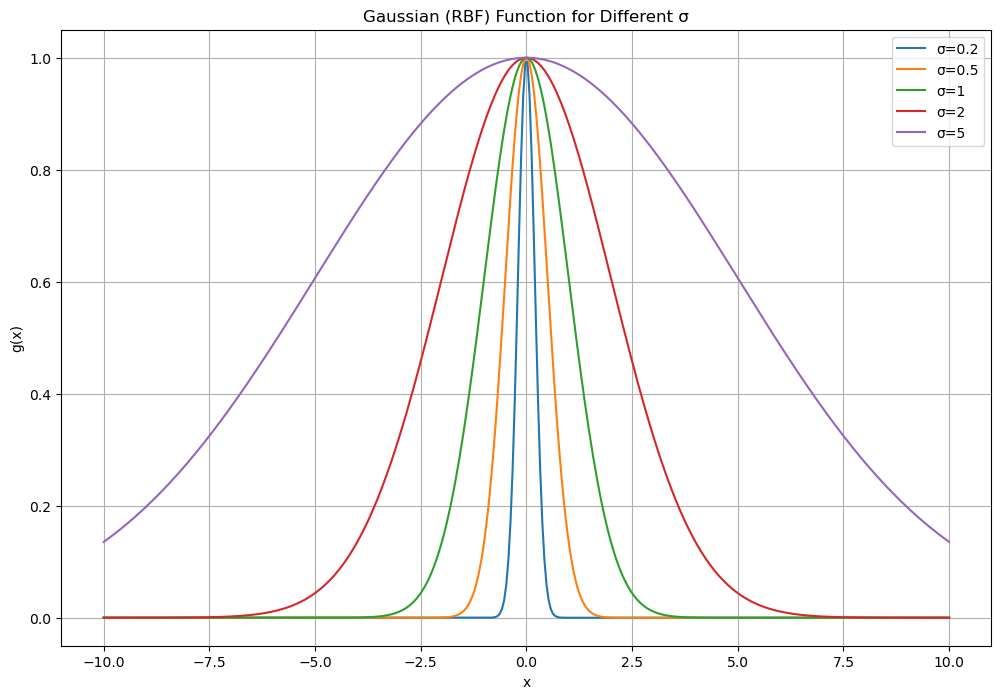

In [24]:
def gaussian(x, sigma):
    return np.exp(-x**2 / (2 * sigma**2))
x = np.linspace(-10, 10, 400)
sigma_values = [0.2, 0.5, 1, 2, 5]

# Create subplots for each σ
plt.figure(figsize=(12, 8))
for sigma in sigma_values:
    y = gaussian(x, sigma)
    plt.plot(x, y, label=f'σ={sigma}')
plt.title('Gaussian (RBF) Function for Different σ')
plt.xlabel('x')
plt.ylabel('g(x)')
plt.grid(True)
plt.legend()
plt.show()

Response of the two input perceptron neuron defined by

$$y=\sigma(\sum_{i=0}^{1}w_ix_i + b)$$

where $w_0=10$,$w_1=10$, $b=-10$.

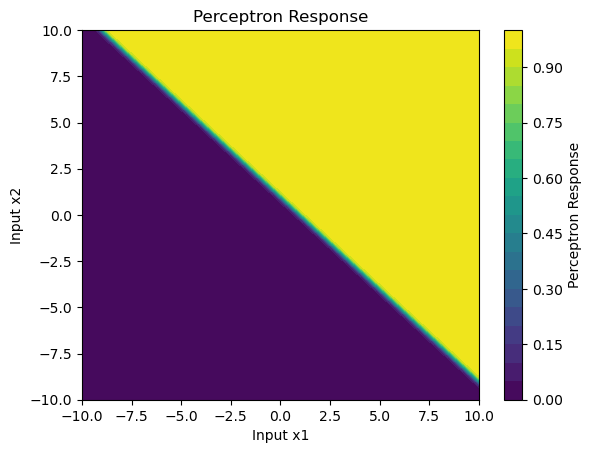

In [25]:

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def perceptron_response(x1, x2, w0, w1, b):
    z = w0 * x1 + w1 * x2 + b
    return sigmoid(z)

x1 = np.linspace(-10, 10, 100)
x2 = np.linspace(-10, 10, 100)
X1, X2 = np.meshgrid(x1, x2)

Z = perceptron_response(X1, X2, 10, 10, -10)

plt.contourf(X1, X2, Z, levels=20, cmap='viridis')
plt.colorbar(label='Perceptron Response')
plt.xlabel('Input x1')
plt.ylabel('Input x2')
plt.title('Perceptron Response')
plt.show()



A response of the two input RBF neuron defined by

$$y=g(\sqrt{\sum_{i=0}^{1}(x_i-c_i)^2})$$

where $c_0=0.5$, $c_1=0.5$, $\sigma=0.15$.

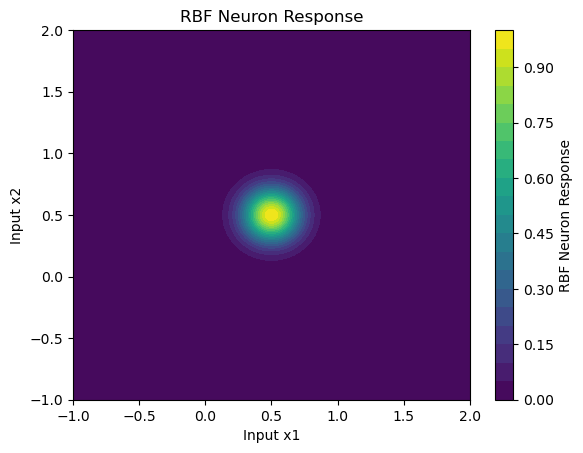

In [26]:

def rbf_response(x1, x2, c0, c1, sigma):
    squared_distance = (x1 - c0) ** 2 + (x2 - c1) ** 2
    return np.exp(-squared_distance / (2 * sigma ** 2))

x1 = np.linspace(-1, 2, 100)
x2 = np.linspace(-1, 2, 100)
X1, X2 = np.meshgrid(x1, x2)

c0 = 0.5
c1 = 0.5
sigma = 0.15

Z = rbf_response(X1, X2, c0, c1, sigma)

plt.contourf(X1, X2, Z, levels=20, cmap='viridis')
plt.colorbar(label='RBF Neuron Response')
plt.xlabel('Input x1')
plt.ylabel('Input x2')
plt.title('RBF Neuron Response')
plt.show()
